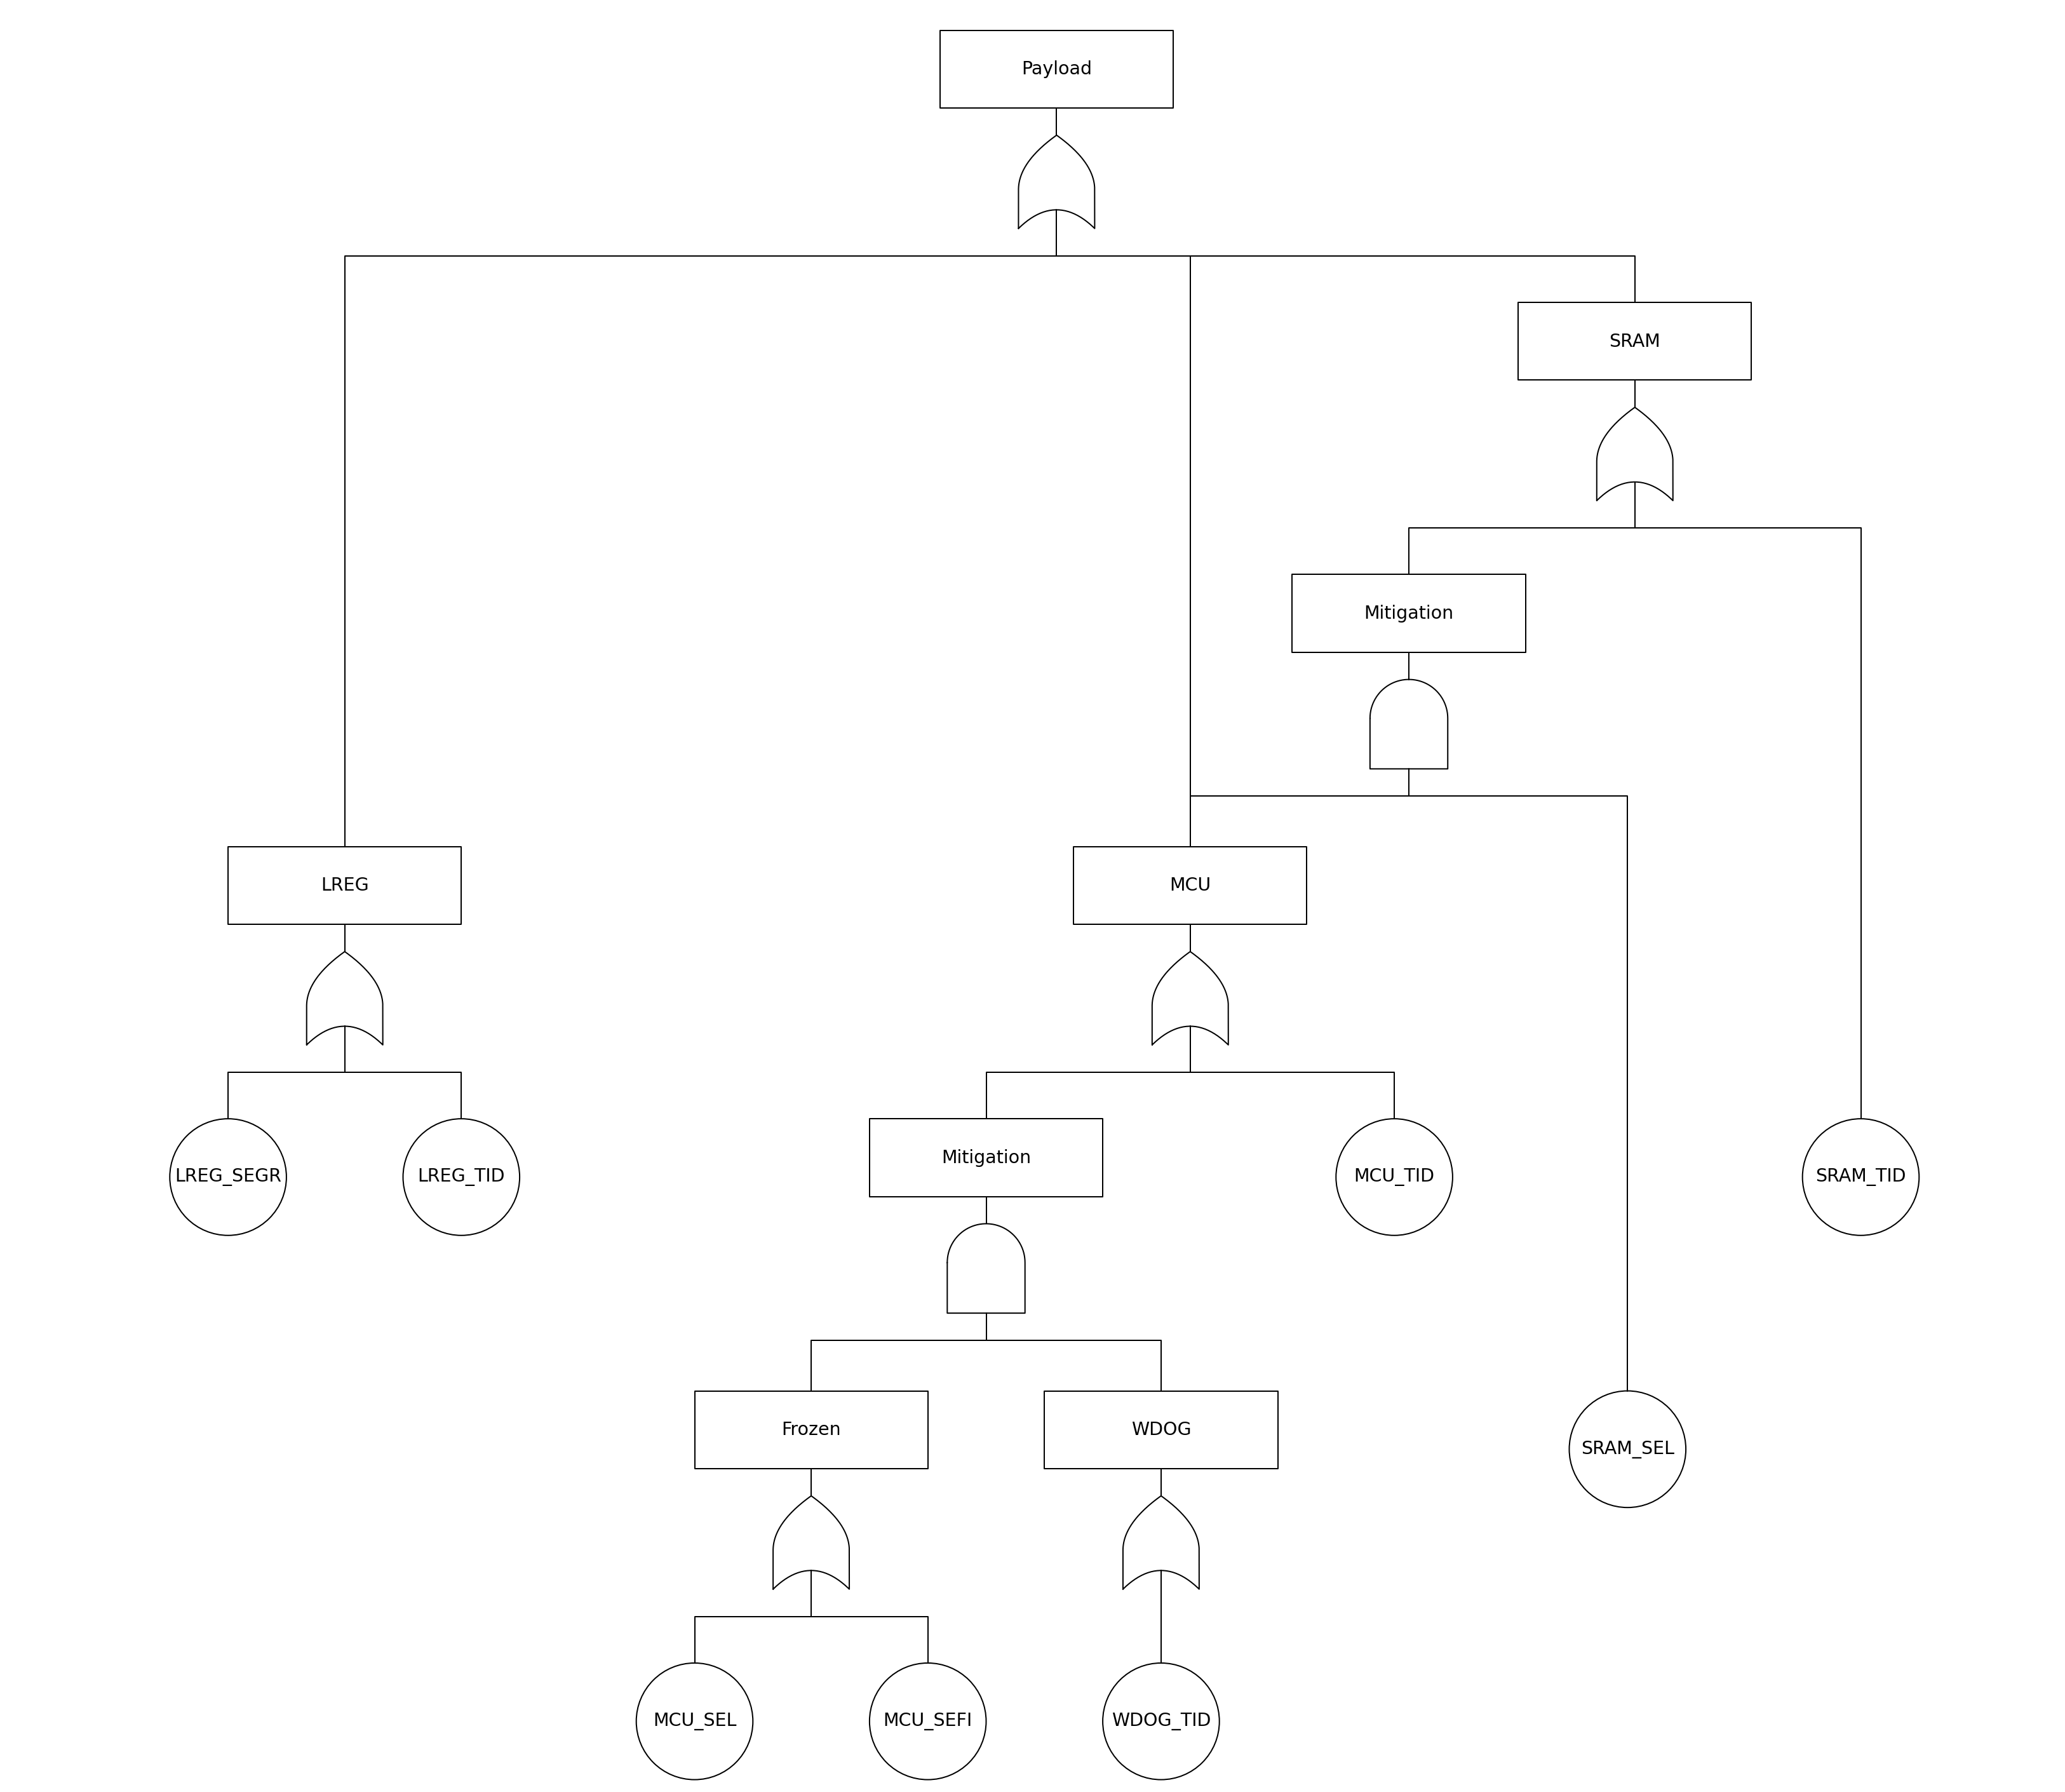

In [7]:
from radstats import diagram
from lxml import etree

system = etree.parse('sys/demo-harder.xml')
diagram.newFT(system)

In [8]:
import pandas as pd
rates = pd.DataFrame({
    'D':1.297E-05, # krad/s
    'SRAM_SEL':1.19749E-02 + 1.24587E-10,
    'MCU_SEFI':9.73404E-05 + 2.62931E-11,
    'MCU_SEL':1.19749E-02 + 4.43484E-12,
    'LREG_SEGR':4.37546E-08
},index=pd.Series([0],name='L'))
rates

,D,SRAM_SEL,MCU_SEFI,MCU_SEL,LREG_SEGR
L,,,,,
0,0.000013,0.011975,0.000097,0.011975,4.375460e-08


In [9]:
import numpy as np
tstep = 24 * 24 * 3600
t = np.linspace(0,tstep,24)
P = pd.concat([rates] * len(t))
P.index = t
P = P.mul(t,axis=0)
P[P.columns[1:]] = 1 - np.exp(-P[P.columns[1:]])
P

,D,SRAM_SEL,MCU_SEFI,MCU_SEL,LREG_SEGR
0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000
9.015652e+04,1.169330,1.0,0.999846,1.0,0.003937
1.803130e+05,2.338660,1.0,1.000000,1.0,0.007858
2.704696e+05,3.507990,1.0,1.000000,1.0,0.011765
3.606261e+05,4.677320,1.0,1.000000,1.0,0.015655
4.507826e+05,5.846650,1.0,1.000000,1.0,0.019531
5.409391e+05,7.015981,1.0,1.000000,1.0,0.023391
6.310957e+05,8.185311,1.0,1.000000,1.0,0.027236
7.212522e+05,9.354641,1.0,1.000000,1.0,0.031065
8.114087e+05,10.523971,1.0,1.000000,1.0,0.034880


In [13]:
from radstats import models
P['SRAM_TID'] = models.lognormal(P['D'],5,0.1)
P['MCU_TID'] = models.lognormal(P['D'],2.5,0.1)
P['LREG_TID'] = models.lognormal(P['D'],3,0.1)
P['WDOG_TID'] = models.lognormal(P['D'],4,0.1)
P

/Users/stephen/Desktop/rad-fault-tree/thesis/radstats/models.py:13: RuntimeWarning: divide by zero encountered in log
  y = (1/2) * (1 + erf((np.log(x) - mean) / (stdev * np.sqrt(2))))


,D,SRAM_SEL,MCU_SEFI,MCU_SEL,LREG_SEGR,SRAM_TID,MCU_TID,LREG_TID,WDOG_TID
0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00
9.015652e+04,1.169330,1.0,0.999846,1.0,0.003937,0.0,0.000000e+00,0.000000e+00,0.000000e+00
1.803130e+05,2.338660,1.0,1.000000,1.0,0.007858,0.0,0.000000e+00,0.000000e+00,0.000000e+00
2.704696e+05,3.507990,1.0,1.000000,1.0,0.011765,0.0,0.000000e+00,0.000000e+00,0.000000e+00
3.606261e+05,4.677320,1.0,1.000000,1.0,0.015655,0.0,0.000000e+00,0.000000e+00,0.000000e+00
4.507826e+05,5.846650,1.0,1.000000,1.0,0.019531,0.0,1.057487e-13,0.000000e+00,0.000000e+00
5.409391e+05,7.015981,1.0,1.000000,1.0,0.023391,0.0,1.713469e-08,0.000000e+00,0.000000e+00
6.310957e+05,8.185311,1.0,1.000000,1.0,0.027236,0.0,3.495551e-05,0.000000e+00,0.000000e+00
7.212522e+05,9.354641,1.0,1.000000,1.0,0.031065,0.0,4.129739e-03,1.076916e-14,0.000000e+00
8.114087e+05,10.523971,1.0,1.000000,1.0,0.034880,0.0,7.167295e-02,5.117318e-11,0.000000e+00


In [14]:
import ipywidgets as w
import numpy as np

progress = w.IntProgress(0,0,len(t))
display(progress)

images = []
for n in range(len(t)):
    progress.value = n
    images.append(diagram.newFT(system,probs=P,frame=n,scale=1))
progress.close()

@w.interact(frame=(0,len(t)-1))
def animate(frame):
    return images[frame]

IntProgress(value=0, max=24)

interactive(children=(IntSlider(value=11, description='frame', max=23), Output()), _dom_classes=('widget-inter…